In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/LSTM_train_week4.csv")

In [ ]:
df.head()


,Date,Price,Open,High,Low,Volume,Chg%,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,4-Jan-21,47.62,48.40,49.83,47.18,528.53K,-1.85%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5-Jan-21,49.93,47.38,50.20,47.24,643.19K,4.85%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-Jan-21,50.63,49.82,50.94,49.48,509.37K,1.40%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7-Jan-21,50.83,50.53,51.28,50.39,369.29K,0.40%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8-Jan-21,52.24,50.93,52.75,50.81,499.42K,2.77%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(df)


505

In [ ]:
opn = df[['Price']]


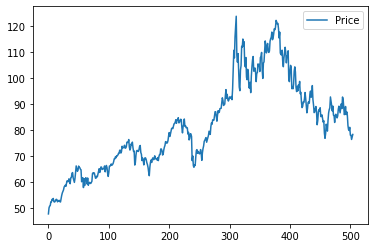

In [ ]:
opn.plot()


In [ ]:
ds = opn.values


In [ ]:
ds


In [ ]:
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [ ]:
len(ds_scaled), len(ds)


(505, 505)

In [ ]:
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [ ]:
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]


In [ ]:
len(ds_train),len(ds_test)


(353, 152)

In [ ]:
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [ ]:
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [ ]:
X_train.shape,y_train.shape


((252, 100), (252,))

In [ ]:
X_test.shape, y_test.shape


((51, 100), (51,))

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
4/4 [==============================] - 10s 667ms/step - loss: 0.1471 - val_loss: 0.0206
Epoch 2/100
4/4 [==============================] - 1s 218ms/step - loss: 0.0262 - val_loss: 0.0524
Epoch 3/100
4/4 [==============================] - 1s 212ms/step - loss: 0.0166 - val_loss: 0.0049
Epoch 4/100
4/4 [==============================] - 1s 209ms/step - loss: 0.0157 - val_loss: 0.0108
Epoch 5/100
4/4 [==============================] - 1s 203ms/step - loss: 0.0143 - val_loss: 0.0038
Epoch 6/100
4/4 [==============================] - 2s 402ms/step - loss: 0.0088 - val_loss: 0.0136
Epoch 7/100
4/4 [==============================] - 2s 412ms/step - loss: 0.0101 - val_loss: 0.0069
Epoch 8/100
4/4 [==============================] - 2s 425ms/step - loss: 0.0069 - val_loss: 0.0038
Epoch 9/100
4/4 [==============================] - 2s 412ms/step - loss: 0.0076 - val_loss: 0.0038
Epoch 10/100
4/4 [==============================] - 2s 425ms/step - loss: 0.0063 - val_loss: 0.0058
Epoch 11

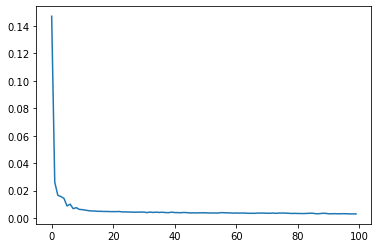

In [ ]:
loss = model.history.history['loss']
plt.plot(loss)

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2/2 [==============================] - 0s 33ms/step


In [ ]:
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

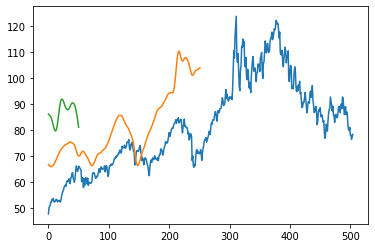

In [ ]:
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [ ]:
type(train_predict)


numpy.ndarray

In [ ]:
test = np.vstack((train_predict,test_predict))


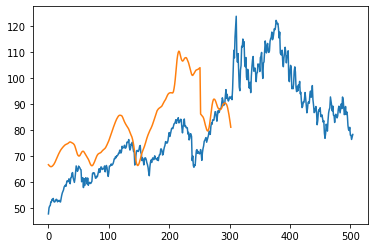

In [ ]:
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [ ]:
len(ds_test)


152

In [ ]:
fut_inp = ds_test[52:]


In [ ]:
fut_inp = fut_inp.reshape(1,-1)


In [ ]:
tmp_inp = list(fut_inp)


In [ ]:
fut_inp.shape


(1, 100)

In [ ]:
tmp_inp = tmp_inp[0].tolist()


In [ ]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.569769024848938], [0.5742611289024353], [0.5787873268127441], [0.5833408236503601], [0.5879150032997131], [0.5925017595291138], [0.5970936417579651], [0.6016830801963806], [0.606261670589447], [0.6108213663101196], [0.6153551936149597], [0.6198541522026062], [0.6243112683296204], [0.6287189722061157], [0.6330708265304565], [0.6373597383499146], [0.6415801048278809], [0.6457267999649048], [0.6497942805290222], [0.6537786722183228], [0.657676100730896], [0.6614838242530823], [0.665198802947998], [0.668819785118103], [0.6723448634147644], [0.675773561000824], [0.6791056990623474], [0.6823410987854004], [0.6854802966117859], [0.6885247826576233]]
30


In [ ]:
prices = normalizer.inverse_transform(lst_output).tolist()


In [ ]:
prices

[[90.9680274105072],
 [91.30978668689728],
 [91.65413982391358],
 [92.0005698633194],
 [92.34857345104218],
 [92.69753386497499],
 [93.04688426494599],
 [93.39604874134064],
 [93.74438789844514],
 [94.0912895488739],
 [94.43622313022614],
 [94.77850389957429],
 [95.11760129451753],
 [95.45293940544128],
 [95.78402848243714],
 [96.1103288936615],
 [96.43141437530518],
 [96.74689494132996],
 [97.05634886264802],
 [97.35948138237],
 [97.65599774360658],
 [97.9456893491745],
 [98.2283249282837],
 [98.50380925178528],
 [98.77199720859528],
 [99.0328525209427],
 [99.2863615846634],
 [99.53251079559327],
 [99.77134096622467],
 [100.00296546459198]]

In [ ]:
prices_array=np.array(prices)

In [ ]:
prices_array

array([[ 90.96802741],
       [ 91.30978669],
       [ 91.65413982],
       [ 92.00056986],
       [ 92.34857345],
       [ 92.69753386],
       [ 93.04688426],
       [ 93.39604874],
       [ 93.7443879 ],
       [ 94.09128955],
       [ 94.43622313],
       [ 94.7785039 ],
       [ 95.11760129],
       [ 95.45293941],
       [ 95.78402848],
       [ 96.11032889],
       [ 96.43141438],
       [ 96.74689494],
       [ 97.05634886],
       [ 97.35948138],
       [ 97.65599774],
       [ 97.94568935],
       [ 98.22832493],
       [ 98.50380925],
       [ 98.77199721],
       [ 99.03285252],
       [ 99.28636158],
       [ 99.5325108 ],
       [ 99.77134097],
       [100.00296546]])

In [ ]:
prices_arr= prices_array.flatten()


In [ ]:
prices_arr

array([ 90.96802741,  91.30978669,  91.65413982,  92.00056986,
        92.34857345,  92.69753386,  93.04688426,  93.39604874,
        93.7443879 ,  94.09128955,  94.43622313,  94.7785039 ,
        95.11760129,  95.45293941,  95.78402848,  96.11032889,
        96.43141438,  96.74689494,  97.05634886,  97.35948138,
        97.65599774,  97.94568935,  98.22832493,  98.50380925,
        98.77199721,  99.03285252,  99.28636158,  99.5325108 ,
        99.77134097, 100.00296546])

In [ ]:
prices_df= pd.DataFrame(prices_arr, columns =["Price"])


In [ ]:
prices_df.to_csv('ass4_oil_price_prediction.csv', index=True)